In [173]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import os

In [175]:
os.chdir(r"D:\2nd_semester\data_mining\assignment\4")

In [227]:
#dataset = "moons.csv"
#dataset = 'one_center.csv'
#dataset = 'two_centers.csv'
dataset = 'two_centers_scattered.csv'
epsilons = [0.07, 0.085, 0.1, 0.2, 0.3, 0.4, 0.5]
min_samples = [10,12,20, 24, 30, 40, 48, 50, 96]

# Outlier Detection
𝝌𝟐 statistic

Where O is the observed value, E is the expected value and “i” is the “ith” position in the contingency table.

A low value for chi-square means there is a high correlation between your two sets of data. In theory, if your observed and expected values were equal (“no difference”) then chi-square would be zero — an event that is unlikely to happen in real life. Deciding whether a chi-square test statistic is large enough to indicate a statistically significant difference isn’t as easy it seems. It would be nice if we could say a chi-square test statistic >10 means a difference, but unfortunately that isn’t the case.

In [211]:
def visualize_chi(dataset,clusters, outlier, out_per):
    data = np.array([list(i) for i in list(pd.read_csv(dataset, header = None).values)])    
    colors = [(0.6, 0.1, 0.02),(0,0,0)]
    c_map = ['k' for i in range(len(data))]
    for i in clusters:
        for j in i:
            c_map[j] = colors[1]
    for i in outlier:
        c_map[i] = colors[0]

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:,0], data[:,1], c=c_map)
    plt.suptitle('outlier %: {}'.format(out_per),
                 fontsize=20)

In [212]:
def chi_square(point, data,):
    dimensions = len(data[0])
    mean = [i/len(data) for i in list(map(sum, zip(*data)))]
    chi_square = 0
    for i in range(dimensions):
        chi_square += (point[i] - mean[i])**2/mean[i]
    return chi_square

In [213]:
def chi_square_values(dataset):
    data = np.array([list(i) for i in list(pd.read_csv(dataset, header = None).values)])
    chi_square_value = []
    for point in data:
        chi_square_value.append(chi_square(point, data,))
    r  = plt.boxplot(chi_square_value,)
    clusters = [set()]
    outlier = set()
    top_points = r["fliers"][0].get_data()[1]
    plt.plot(np.ones(len(top_points)), top_points, "+")
    top_points = set(top_points)
    for i in range(len(data)):
        if chi_square_value[i] in top_points:
            outlier.add(i)
        else:
            clusters[0].add(i)
    
    visualize_chi(dataset, clusters,outlier, (len(outlier)/len(data)) * 100)
    

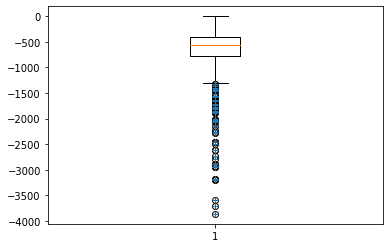

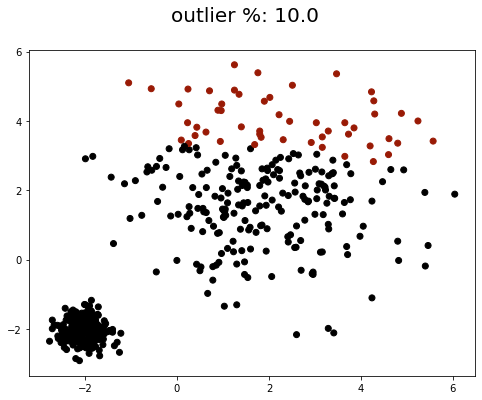

In [228]:
chi_square_values(dataset)

# Part 2

In [215]:
def visualize(dataset,clusters, epsilon, min_points, score, outlier, out_per):
    data = np.array([list(i) for i in list(pd.read_csv(dataset, header = None).values)])    
    colors = [(0.6, 0.1, 0.02),(0,0,0)]
    c_map = ['k' for i in range(len(data))]
    for i in clusters:
        for j in i:
            c_map[j] = colors[1]
    for i in outlier:
        c_map[i] = colors[0]

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:,0], data[:,1], c=c_map)
    plt.suptitle('epsilon: {}, min_points: {}, cluster: {}, silhouette: {}, outlier %: {}'.format(epsilon,min_points,len(clusters),score,out_per),
                 fontsize=20)

In [222]:
def outlier_search(dataset, epsilon, min_samples,):
    data = [list(i) for i in list(pd.read_csv(dataset, header = None).values)]
    for epsilon in epsilons:
        for min_sample in min_samples:
            dbscan = DBSCAN(eps = epsilon,min_samples = min_sample)
            model = dbscan.fit(data)
            labels = model.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            clusters = [set() for i in range(n_clusters_)]
            outlier = set()
            for i in range(0,len(labels)):
                if labels[i] == -1:
                    outlier.add(i)
                else:
                    clusters[labels[i]].add(i)
            if len(outlier) != len(data) and len(set(labels)) != 1:
                score  = metrics.silhouette_score(data, labels)
                visualize(dataset,clusters, epsilon, min_sample, score, outlier, len(outlier)/len(data) * 100)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

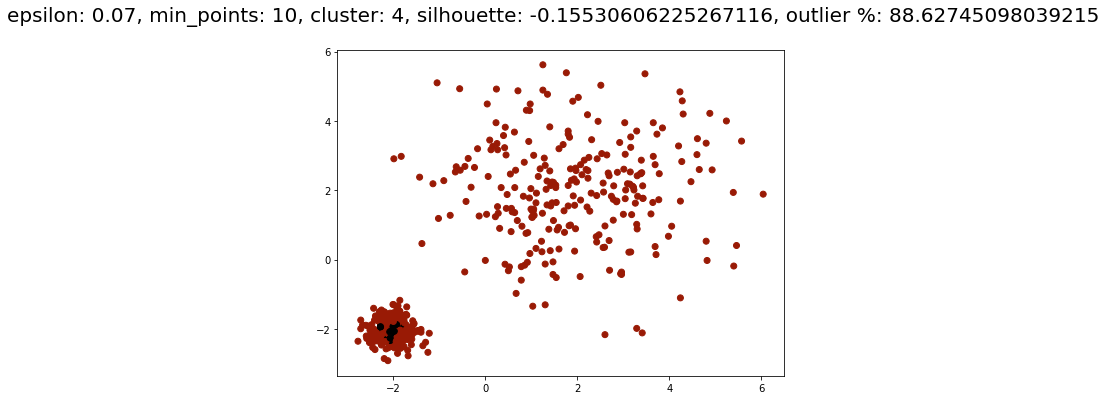

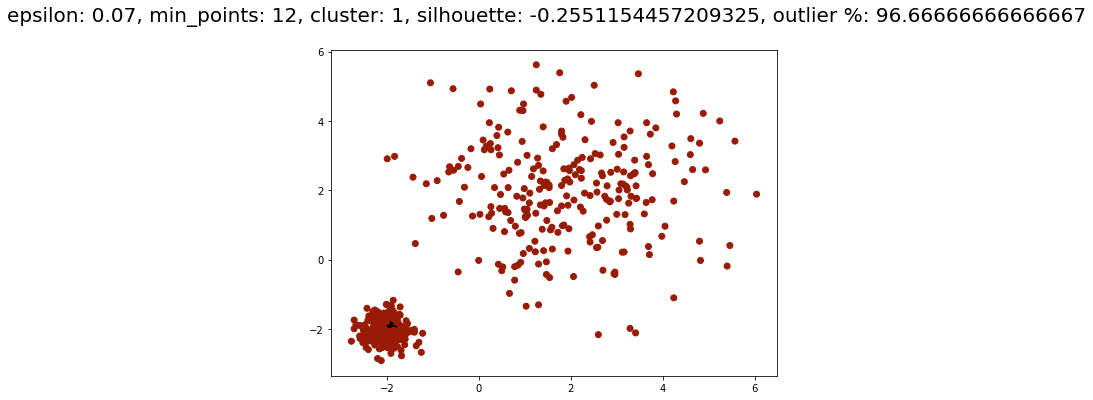

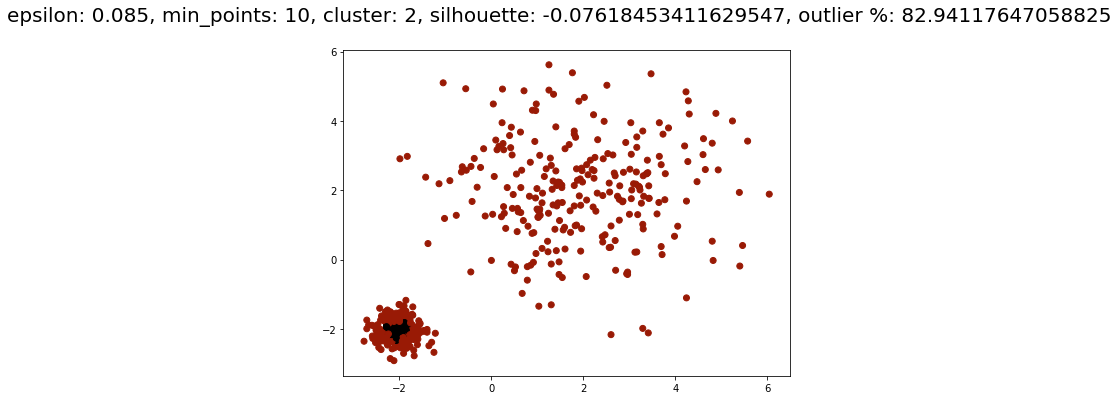

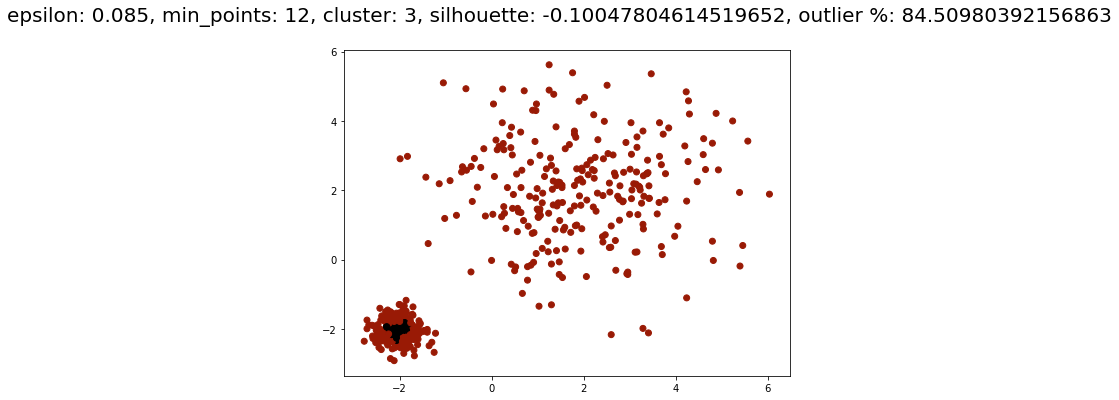

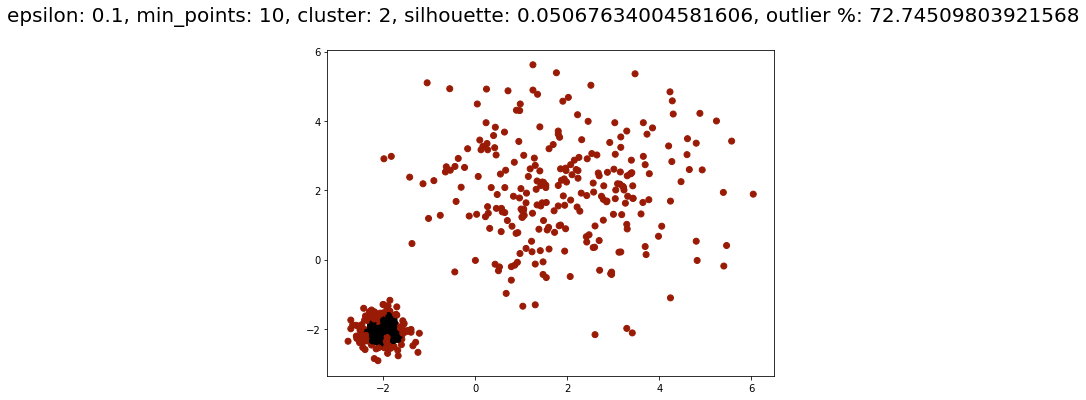

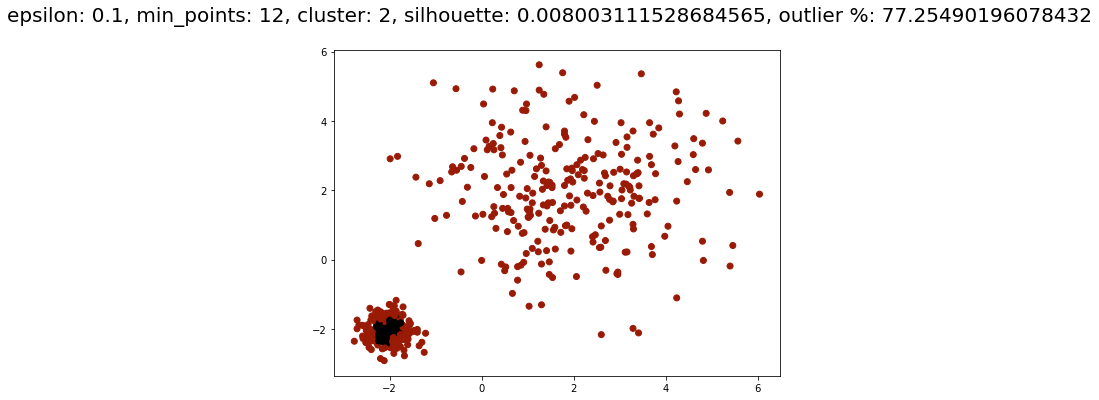

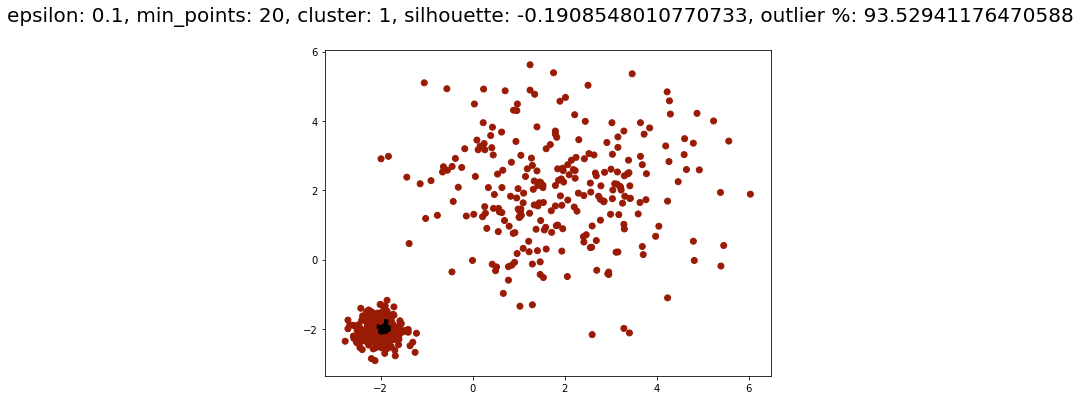

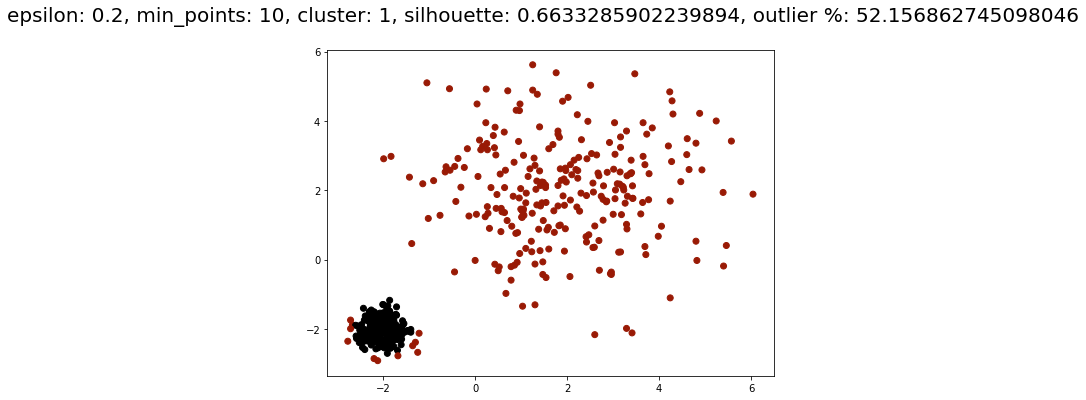

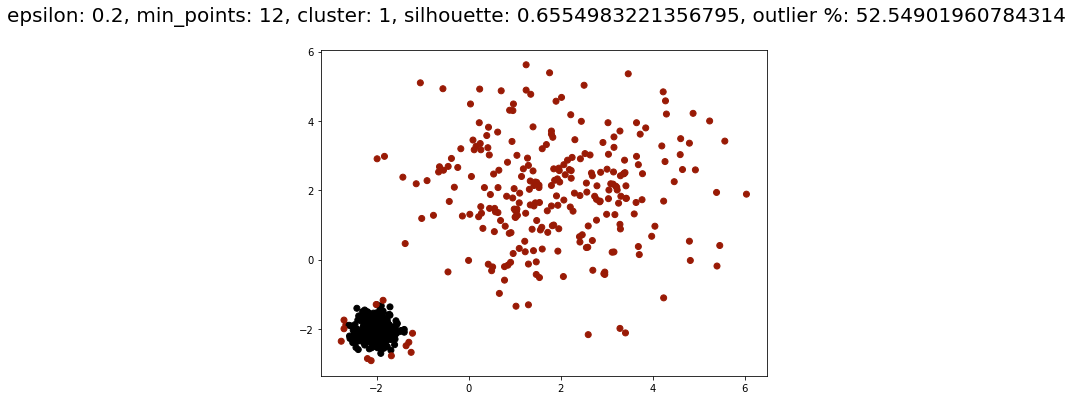

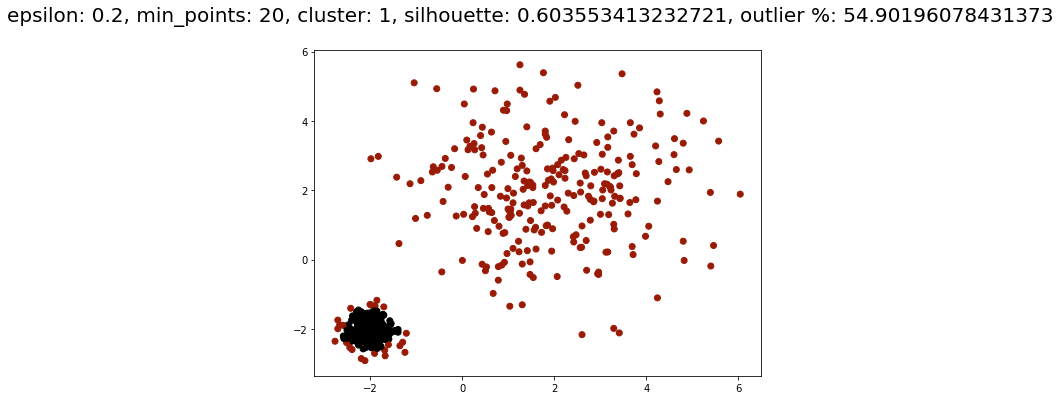

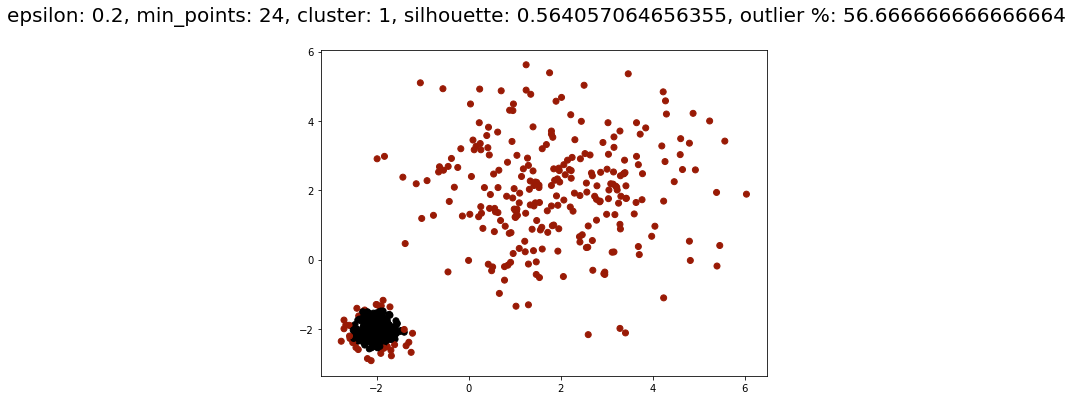

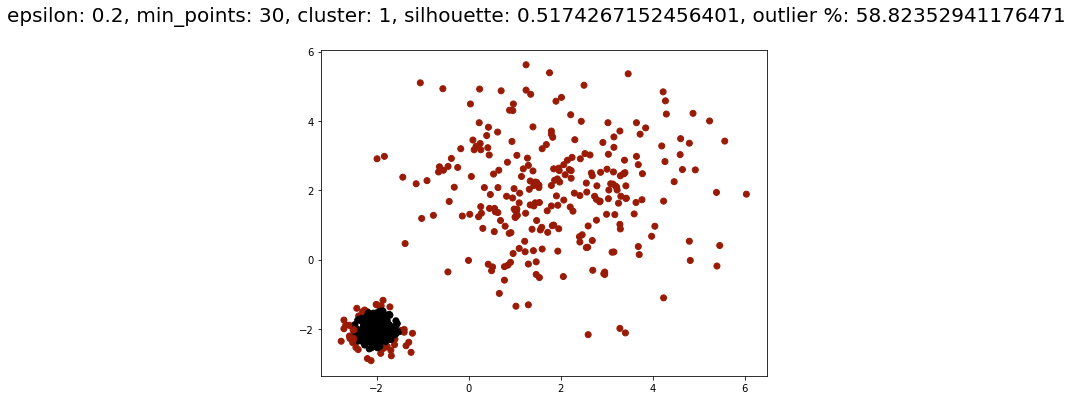

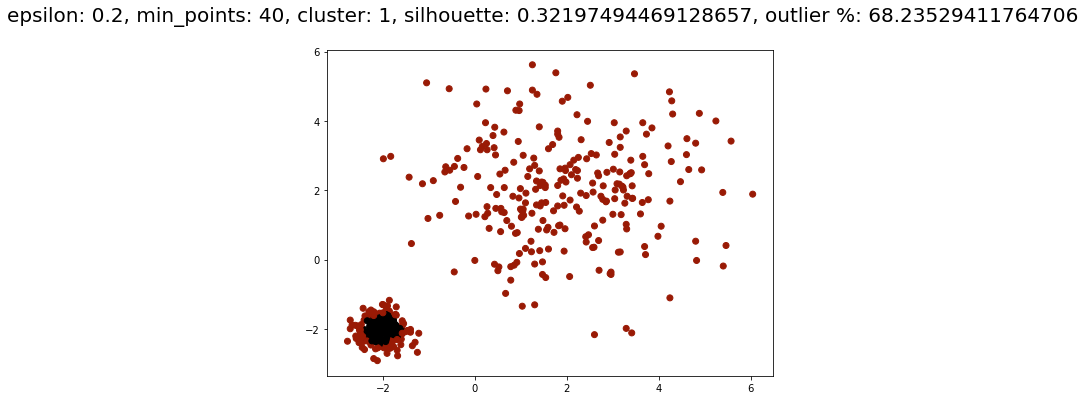

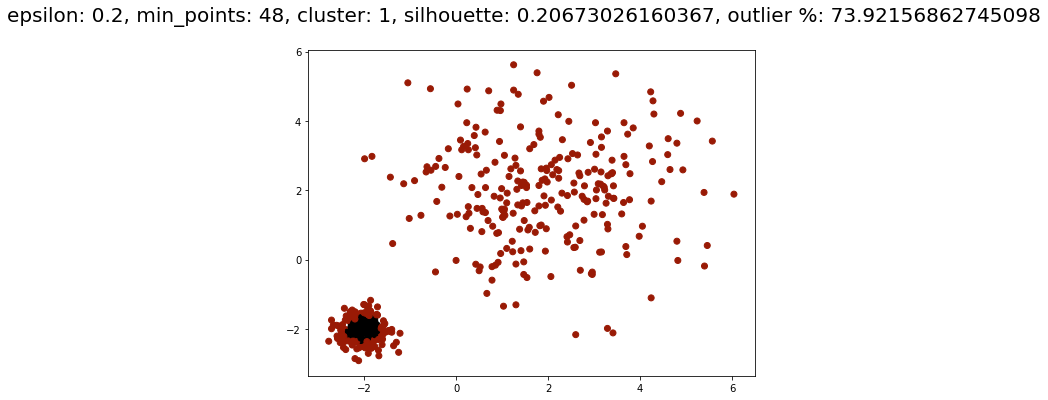

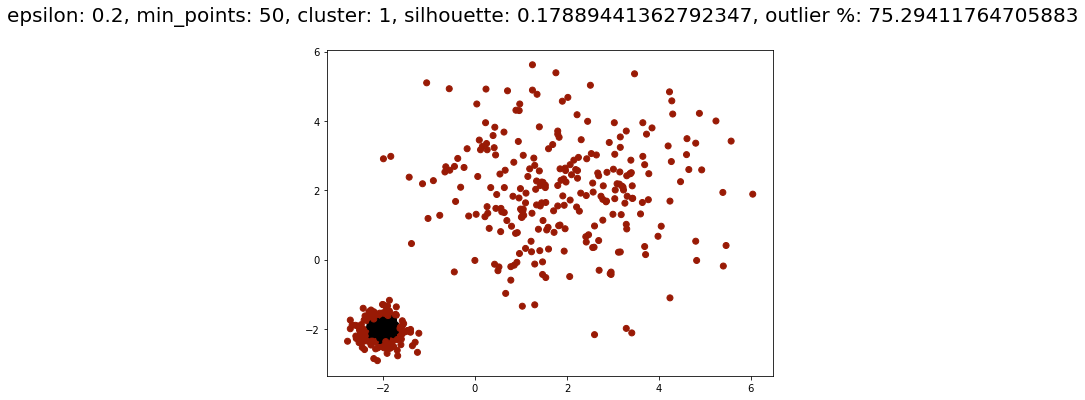

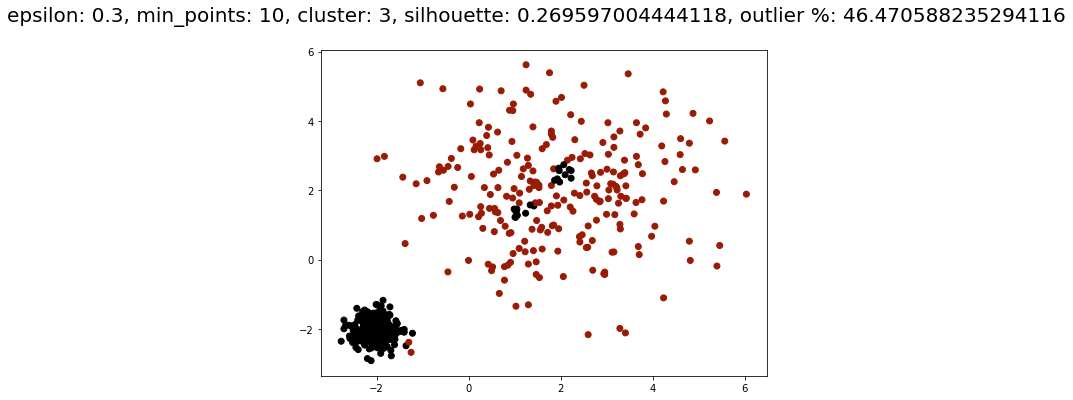

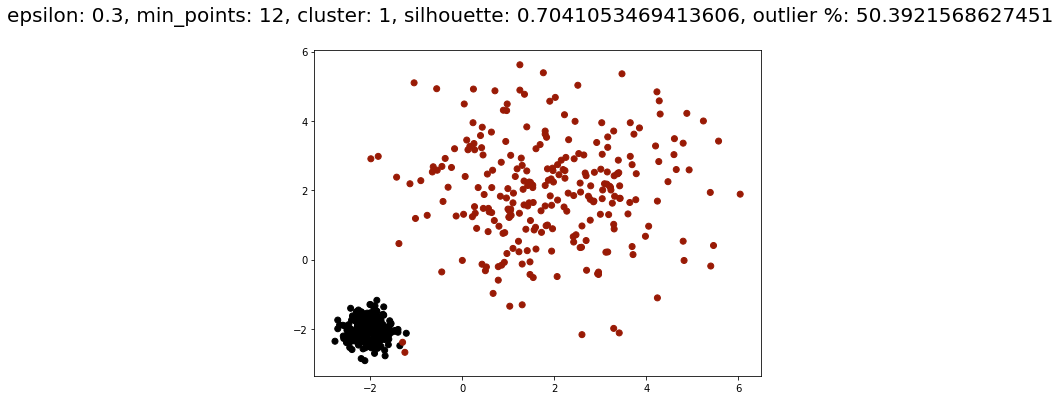

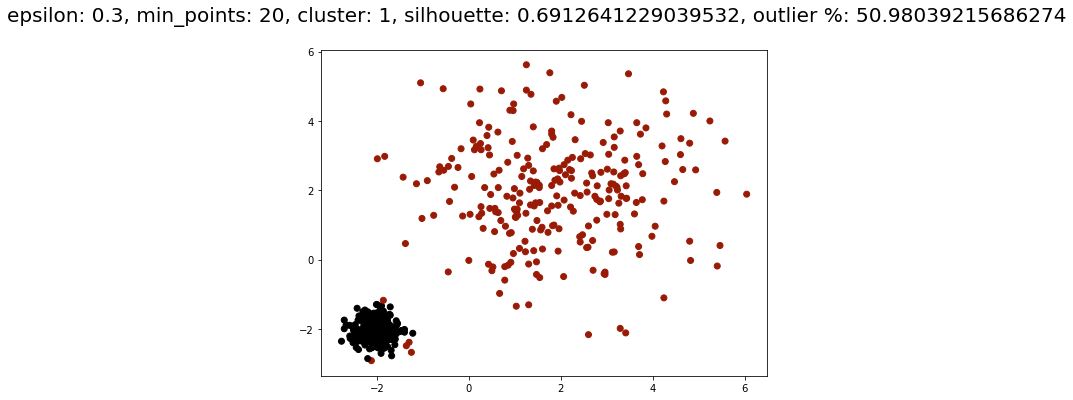

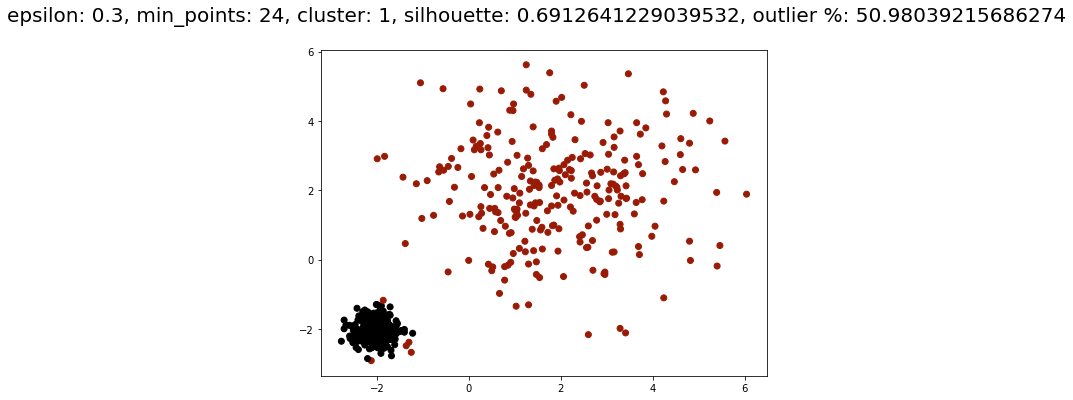

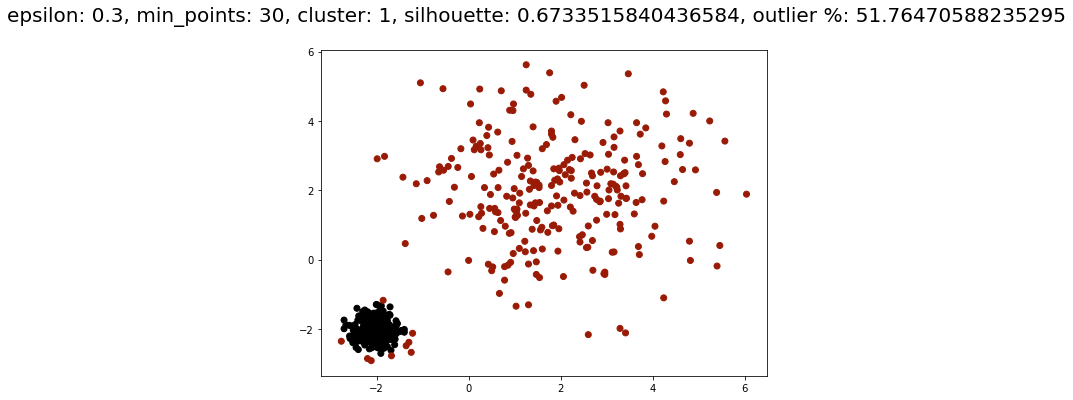

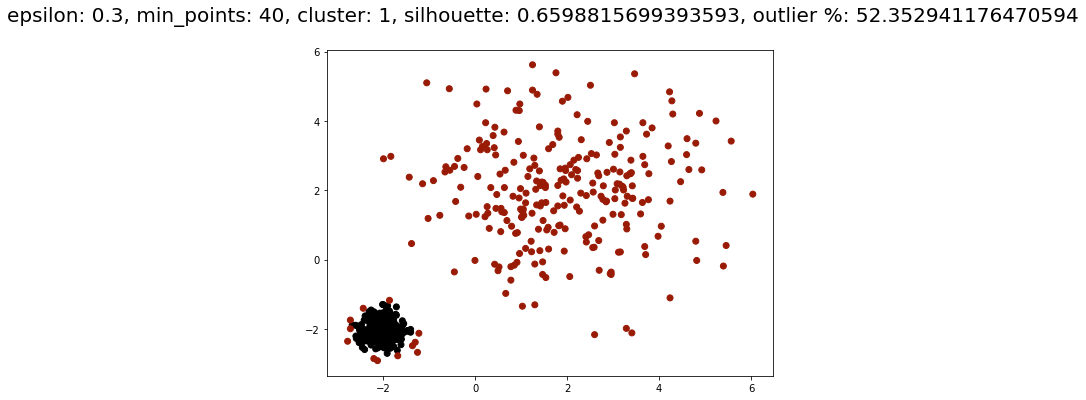

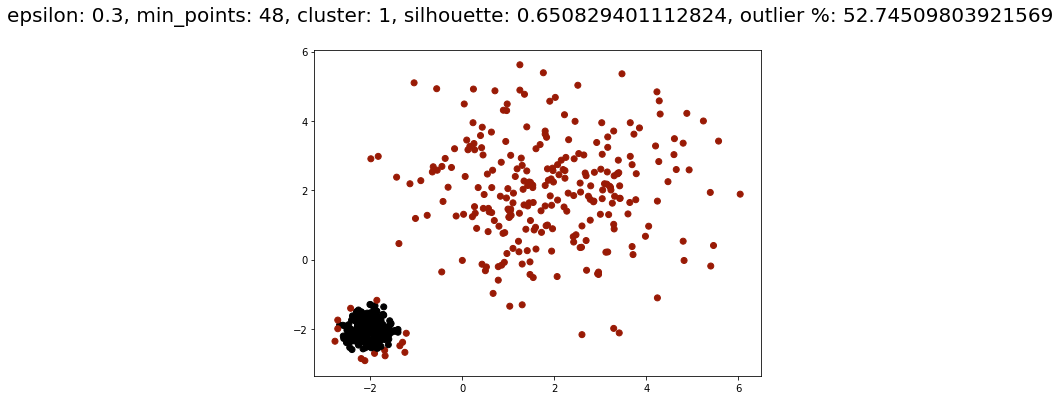

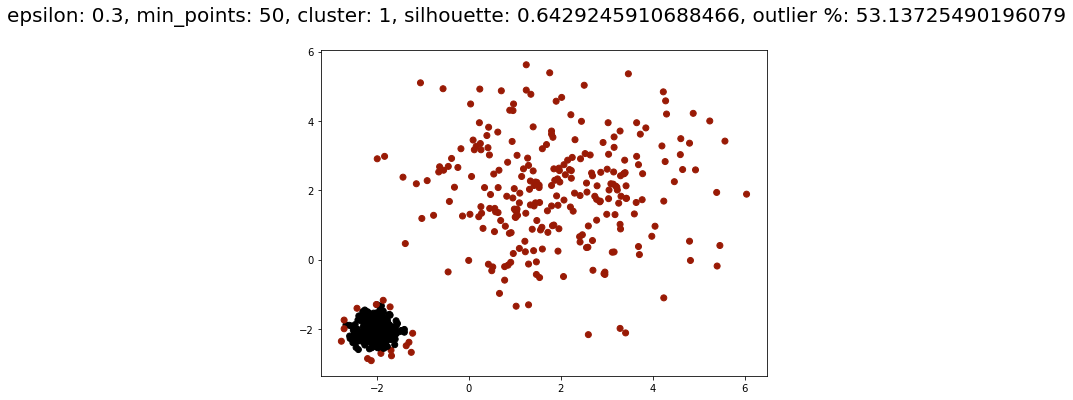

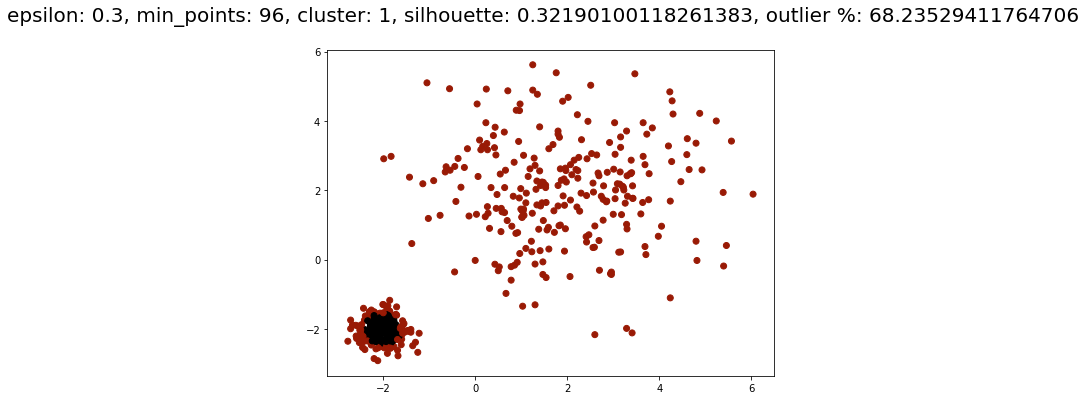

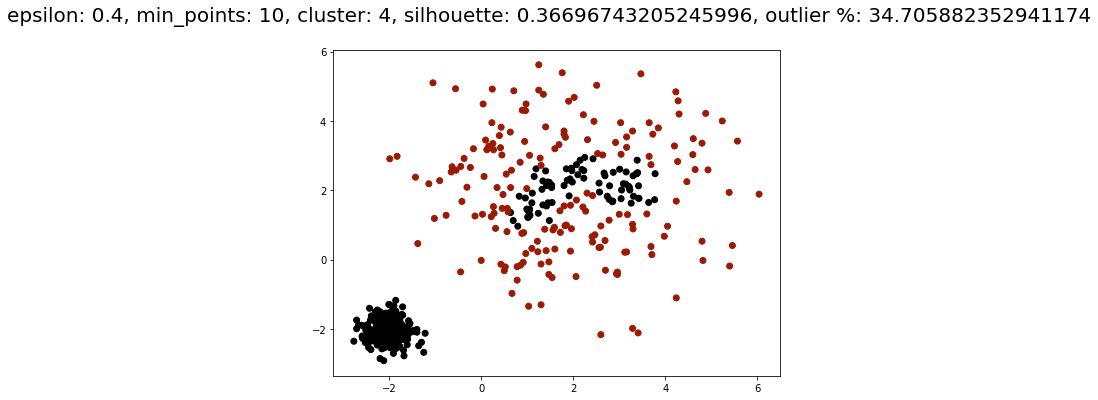

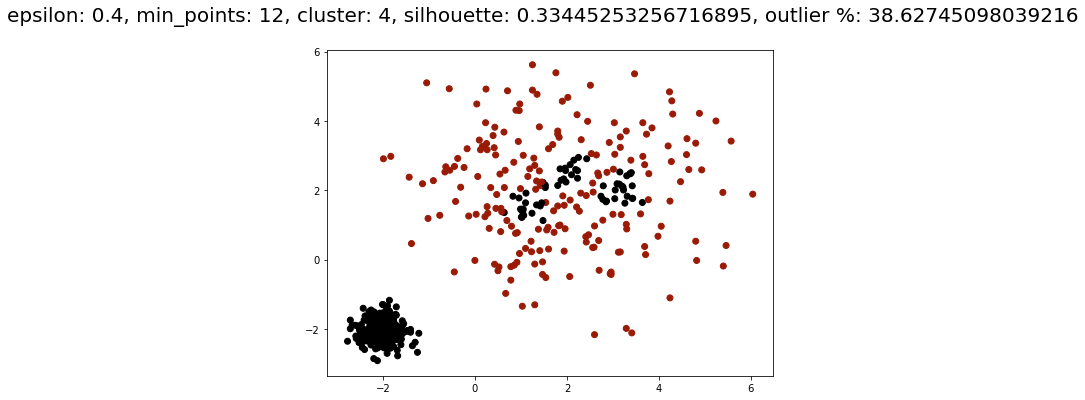

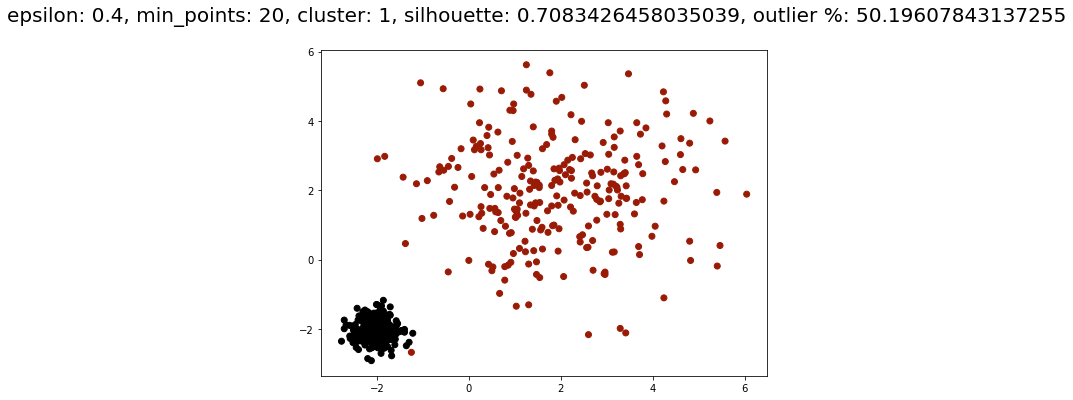

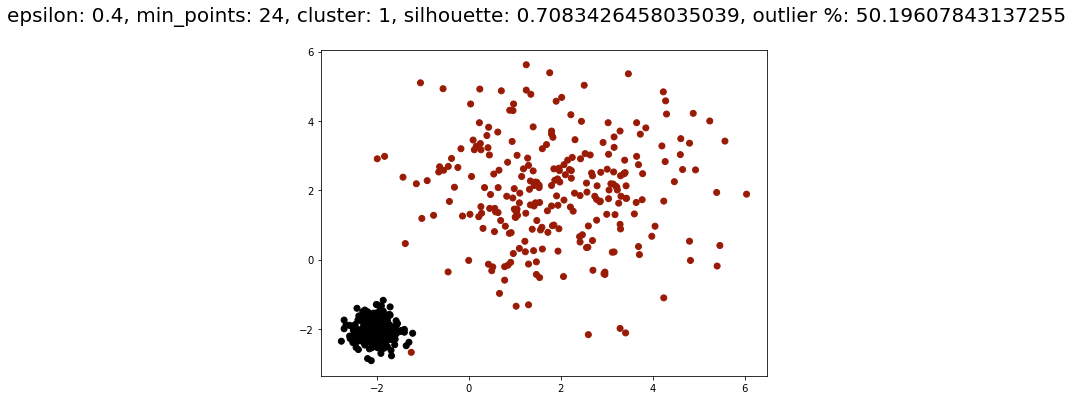

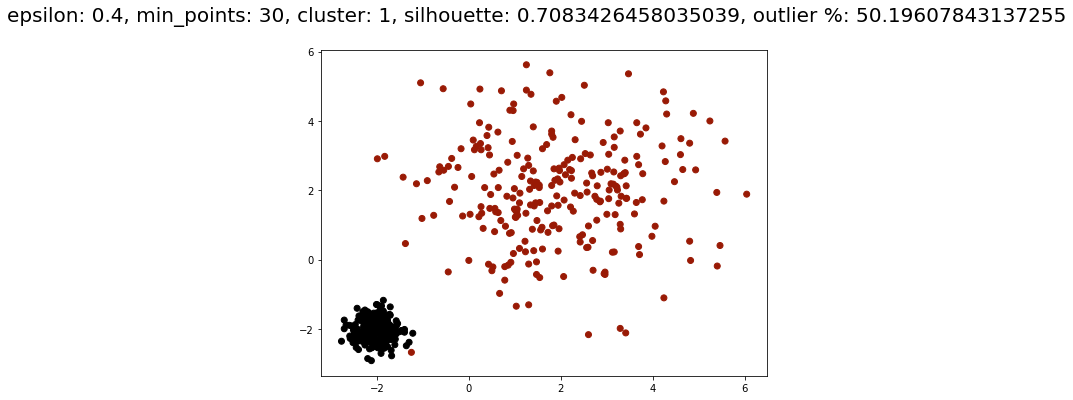

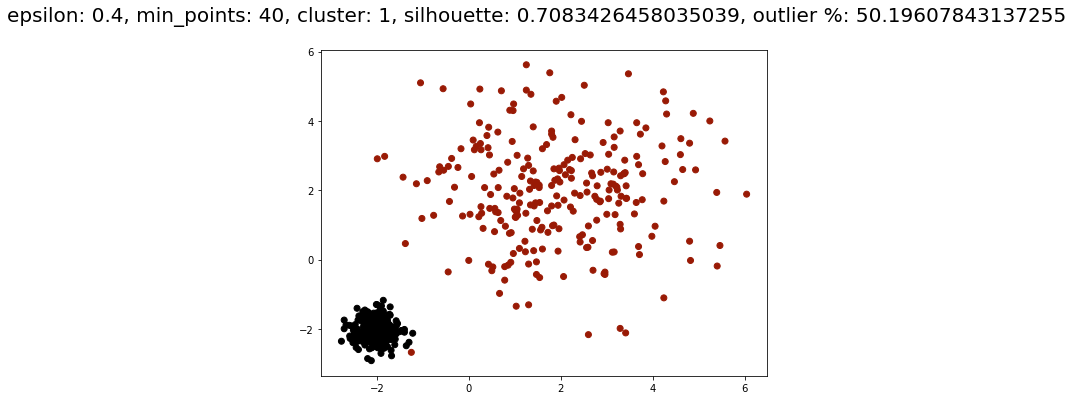

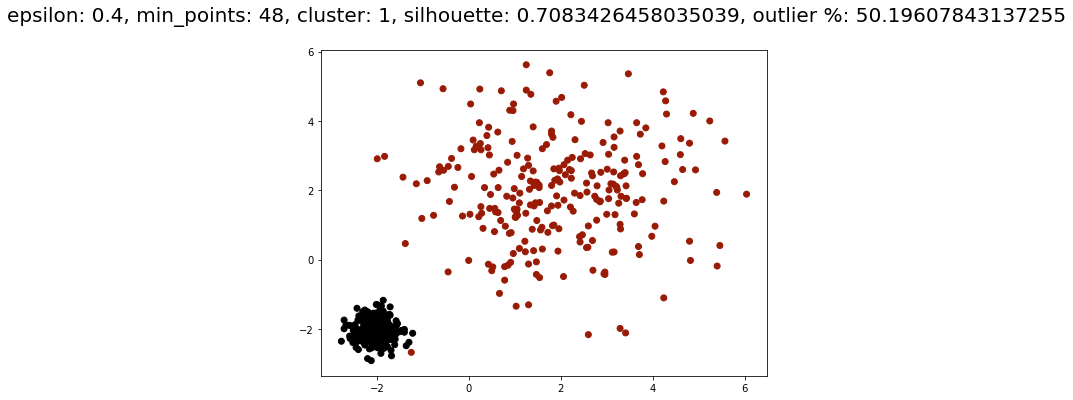

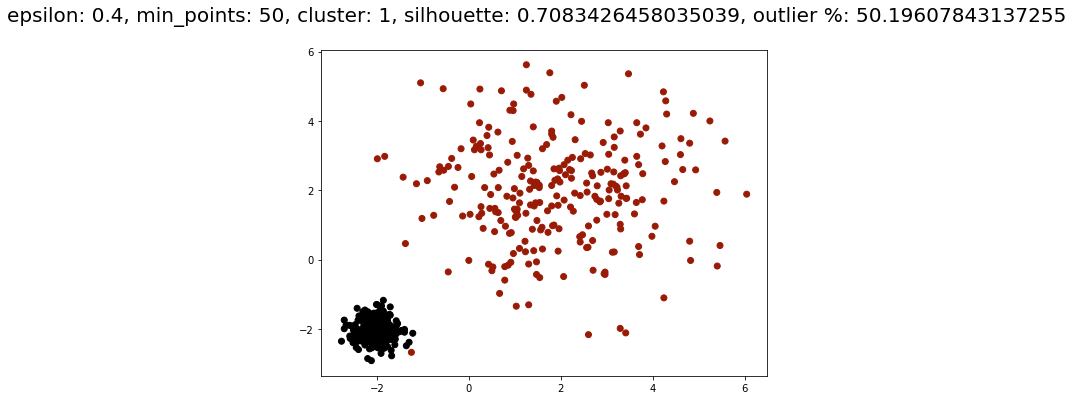

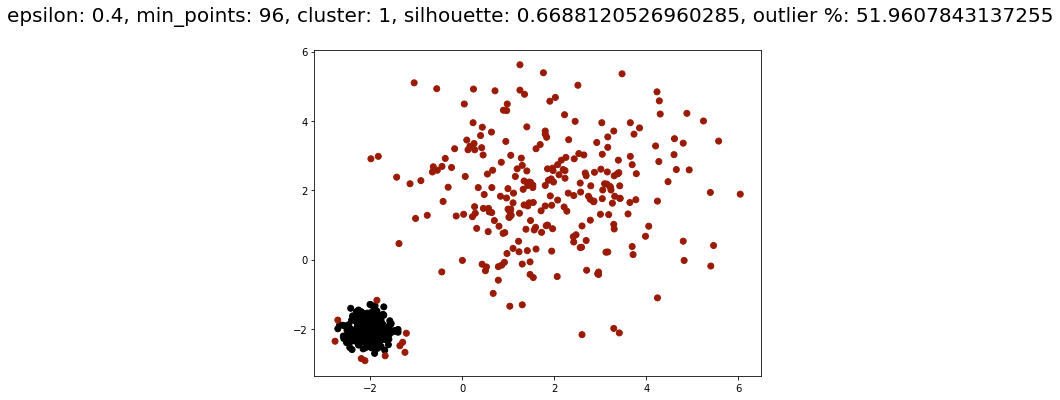

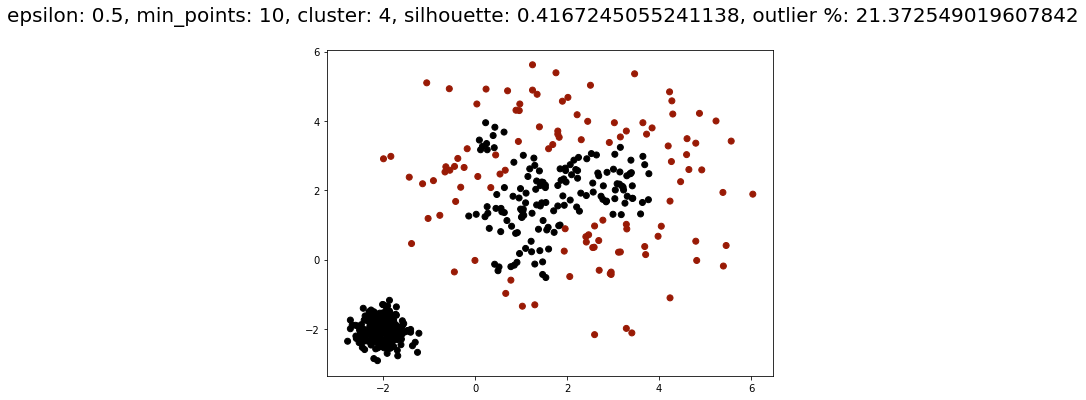

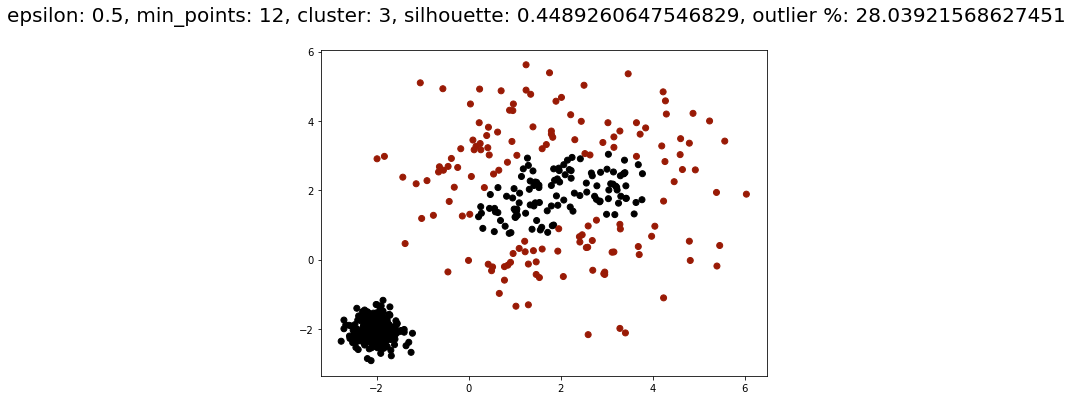

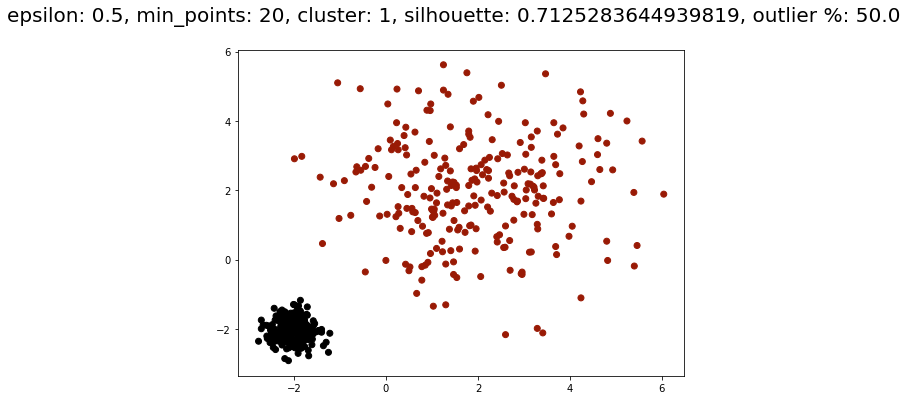

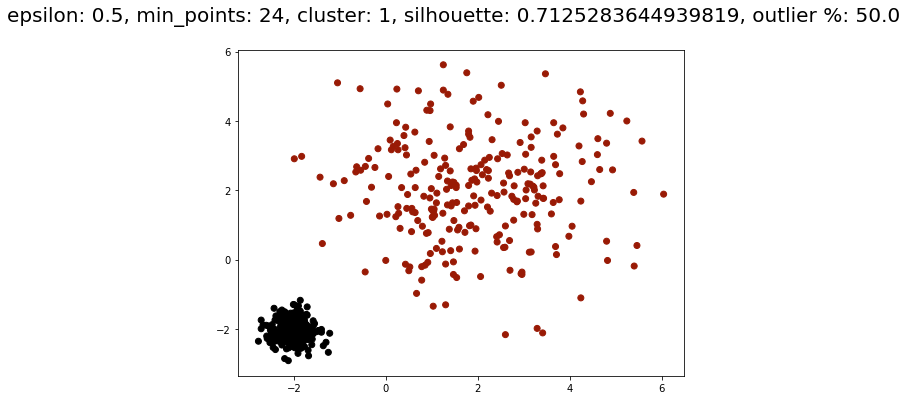

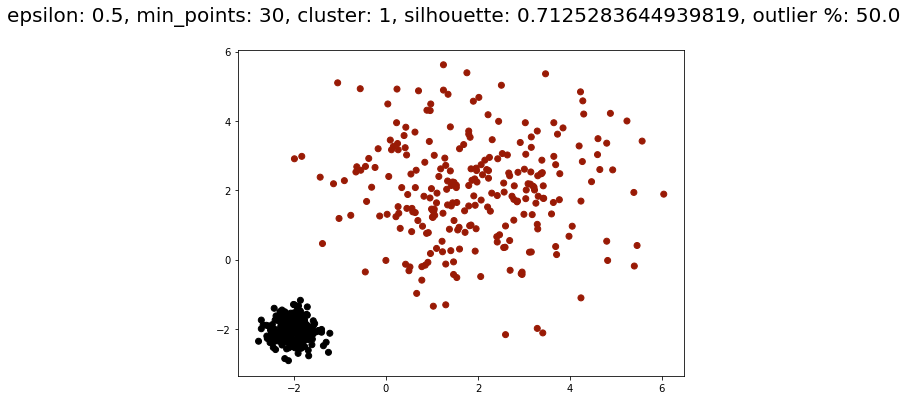

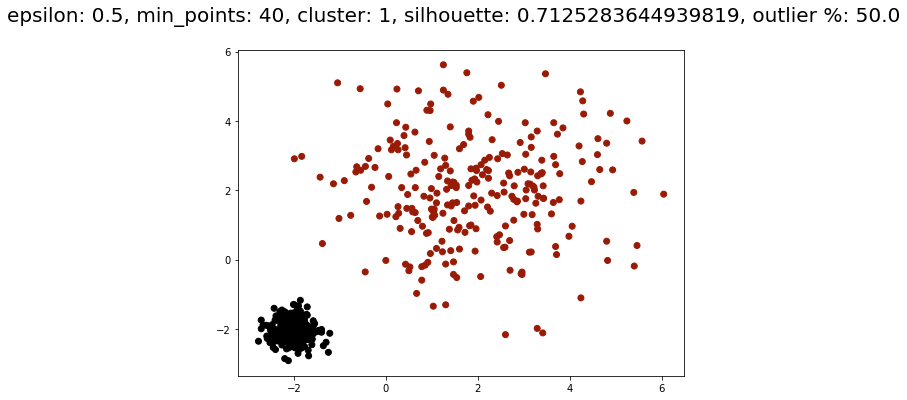

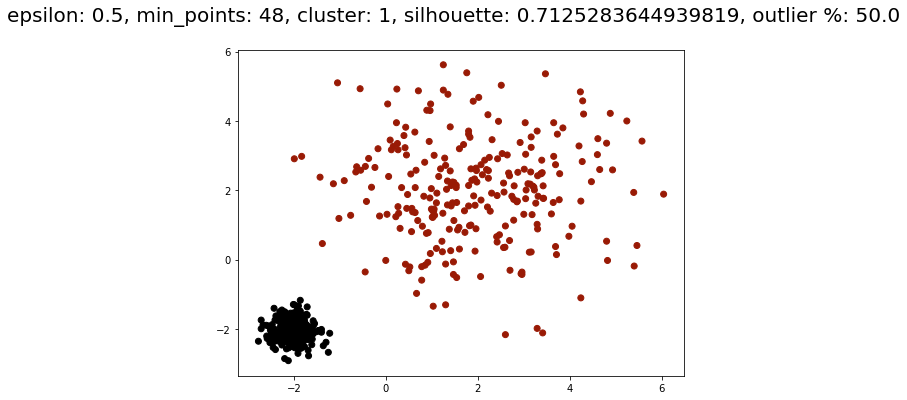

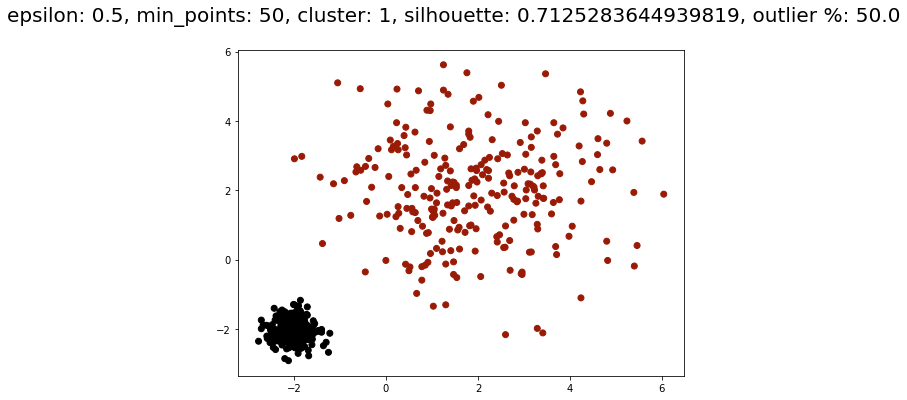

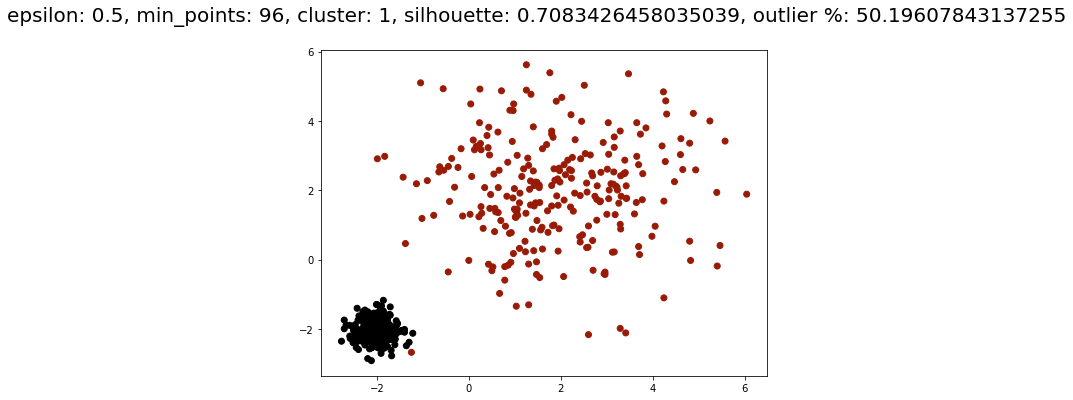

In [229]:
outlier_search(dataset, epsilons, min_samples)